In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
import scipy
import numpy as np
from fitters import *
from tools import *
from plots import *
from trainer import *
from results import Results
set_seaborn()

In [136]:
resPH, stimPH = read_lmc('PHOTO')
res1, stim3 = read_lmc('LMC-BG1')
res2, stim3 = read_lmc('LMC-BG2')
res3, stim3 = read_lmc('LMC-BG3')
res4, stim4 = read_lmc('LMC-BG4')
res5, stim5 = read_lmc('LMC-BG5')
res6, stim6 = read_lmc('LMC-BG6')

TIME = 1.0
all_results = []

In [137]:
X = preprocess(resPH, factor=10, method='mean') 
Y = preprocess(res4, factor=10, method='mean')  


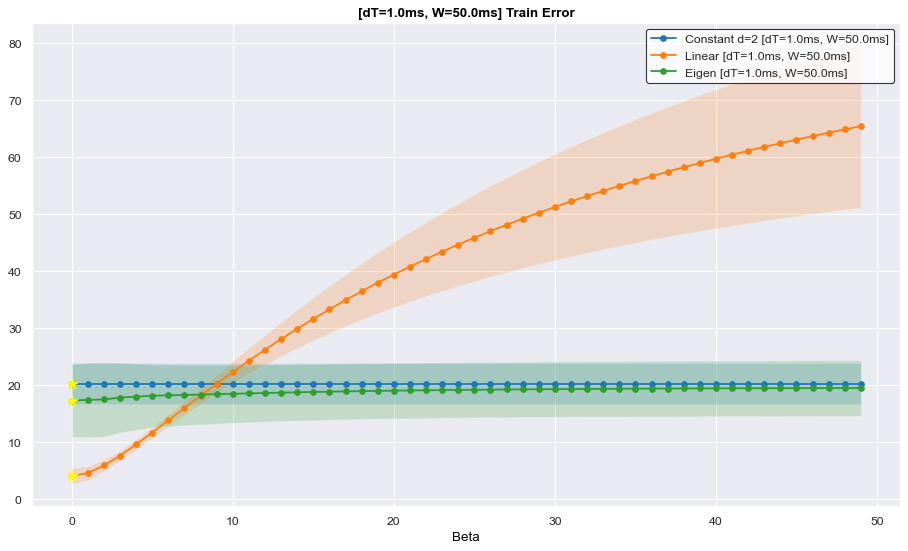

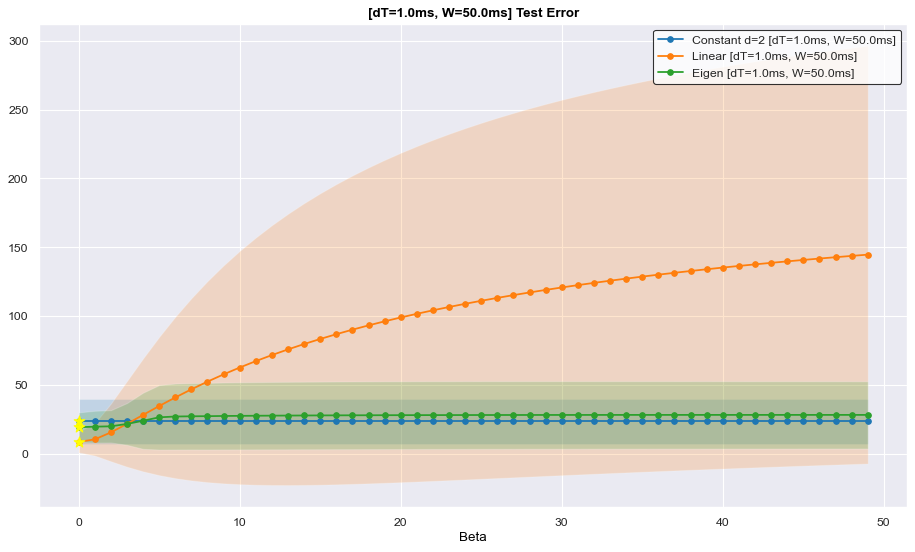

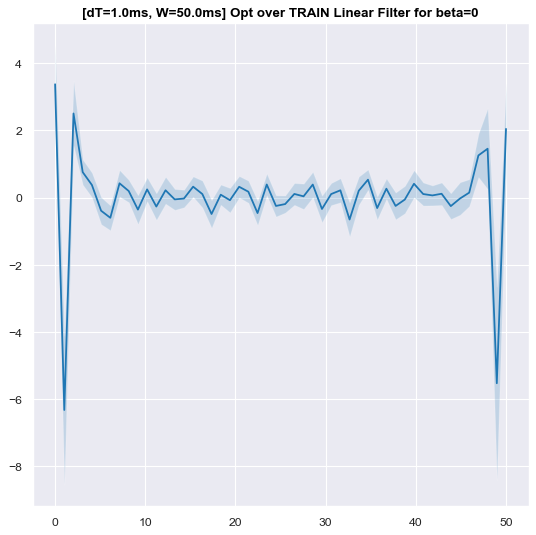

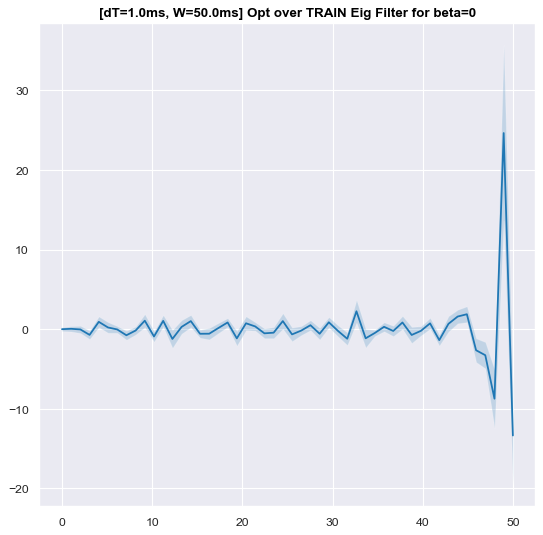

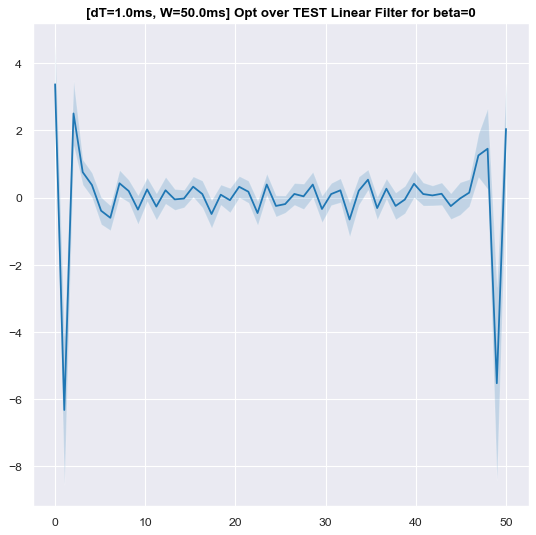

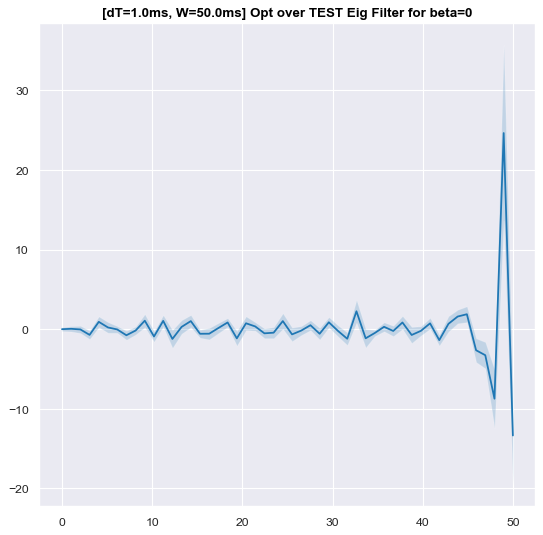

In [139]:
data = 'LMC-BG1'
d_method = 'mean'
factor = 10
dim = 50
betas = np.arange(0,50,1)
X = preprocess(resPH, factor=factor, method=d_method) 
Y = preprocess(res1, factor=factor, method=d_method) 
# X -= X.mean()
# Y -= Y.mean()
time_window = round( dim*(TIME/len(X))*1000, 3)
dT = 1/len(X)*1000
time_str = f'dT={dT}ms, W={time_window}ms'
title = f'[{time_str}]'


model = ConstantModel(f'Constant d=2 {title}')
res = train_test_method(X, Y, model, 2, betas=betas)
C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Eig50_Results = Results(model.name, *res)

cur_results = [C2_Results, Lin50_Results, Eig50_Results]
all_results.extend(cur_results)

# plotting
plot_beta_errs(cur_results, title=title)
# plot_params(Lin50_Results.get_params(), title=f'{title} Linear Params')
# plot_params(Eig50_Results.get_params(), title=f'{title} Eig Params')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
# plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
# plot_self_corr(X, dim, title=title)


In [120]:
model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
EigResults = Results(model.name, *res)

alpha = 6
model = EigenModel(f'Eigen {title}')
res = train_test_method(X*alpha, Y*alpha, model, dim, betas=betas)
alpha_EigResults = Results(model.name, *res)



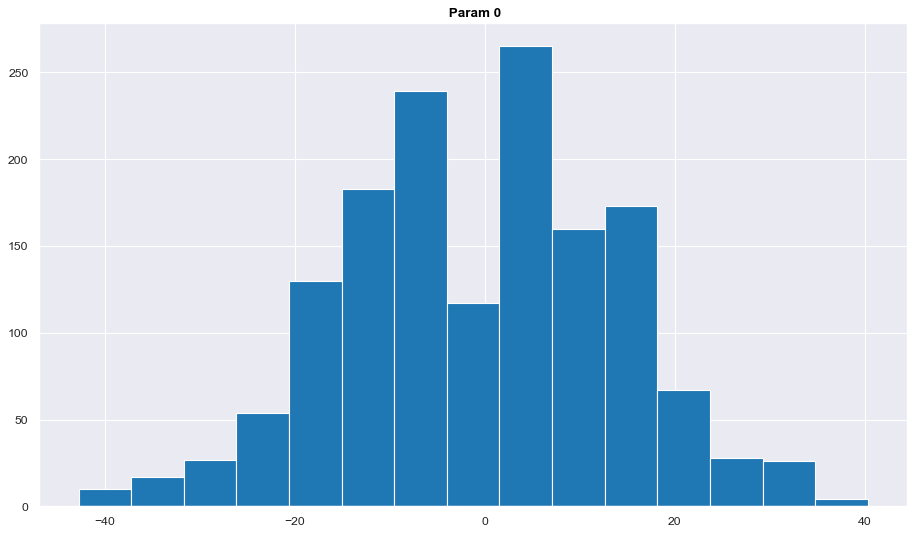

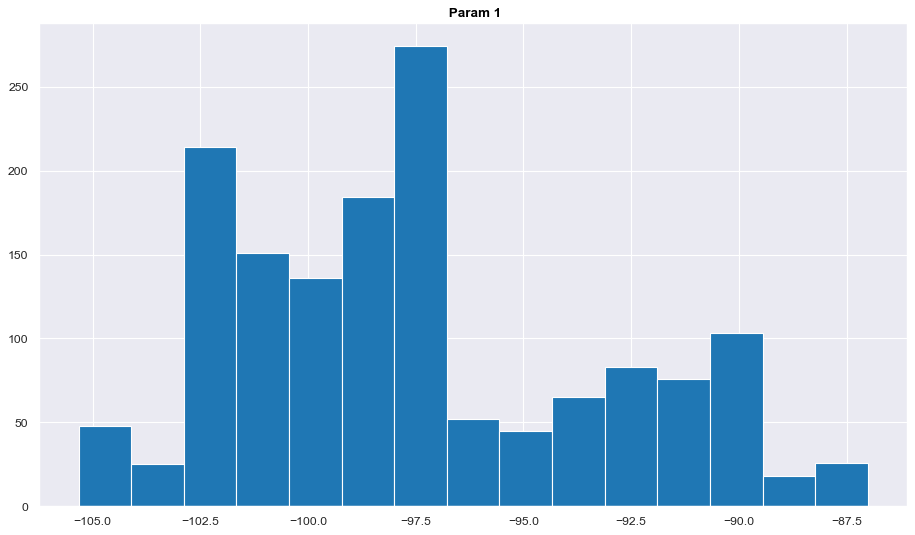

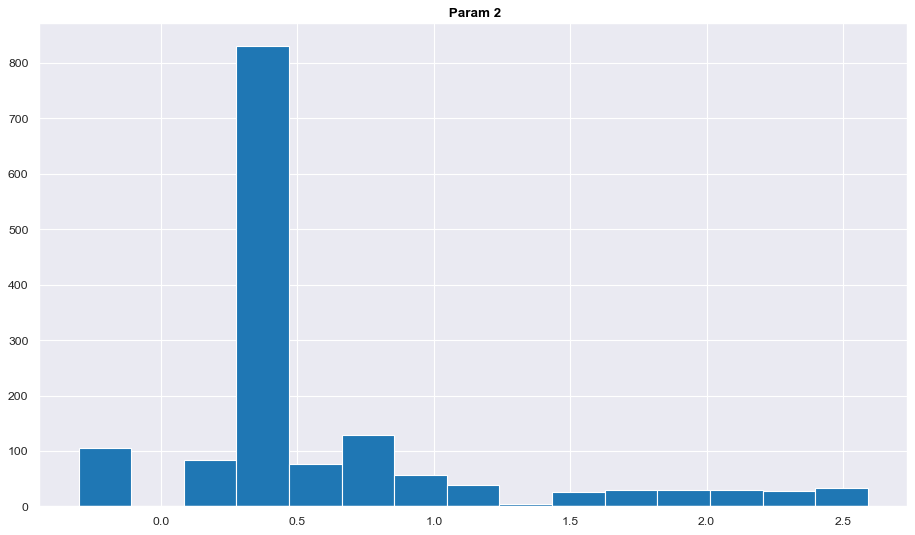

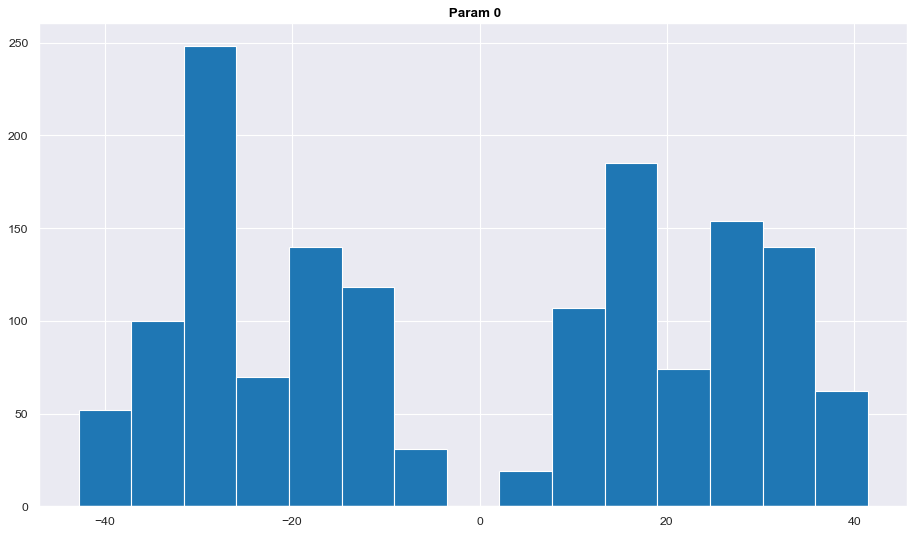

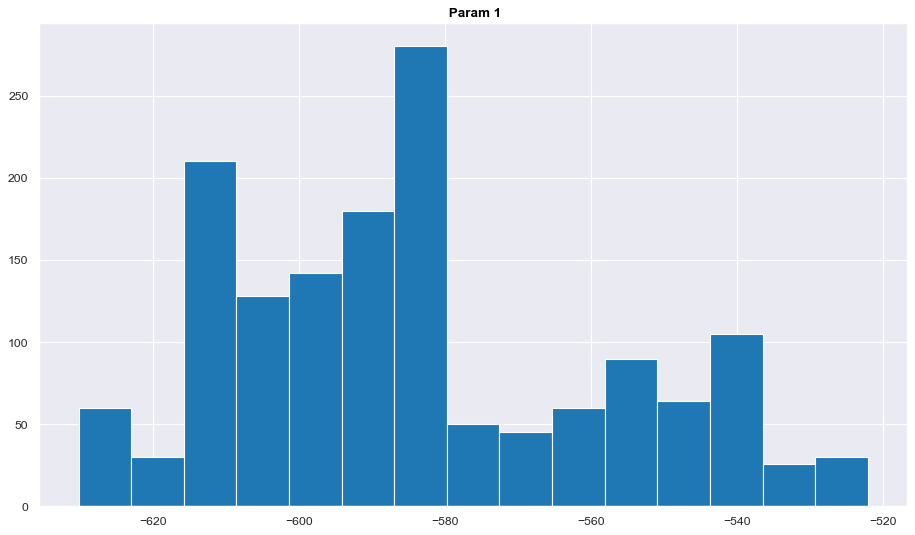

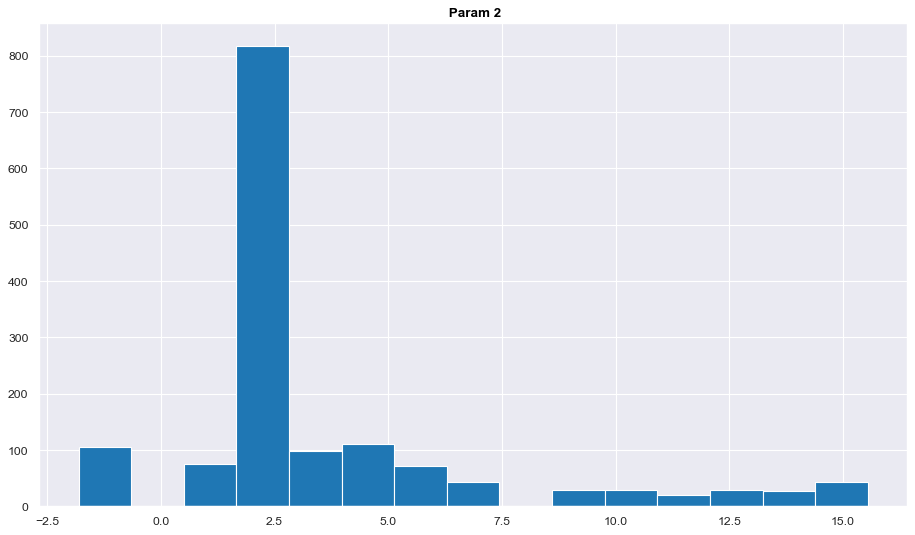

In [121]:

plot_params(EigResults.get_params())
plot_params(alpha_EigResults.get_params())

In [ ]:
data = 'LMC-BG4'
d_method = 'mean'
factor = 20
dim = 25
betas = np.concatenate([np.linspace(0,0.5,40),np.arange(1,10,2)])
X = preprocess(resPH, factor=factor, method=d_method)
Y = preprocess(res4, factor=factor, method=d_method) *-1
time_window = round( dim*(TIME/len(X))*1000, 3)
dT = 1/len(X)*1000
time_str = f'dT={dT}ms, W={time_window}ms'
title = f'[{time_str}]'


model = ConstantModel(f'Constant d=2 {title}')
res = train_test_method(X, Y, model, 2, betas=betas)
C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Eig50_Results = Results(model.name, *res)

cur_results = [C2_Results, Lin50_Results, Eig50_Results]
all_results.extend(cur_results)

# plotting
plot_beta_errs(cur_results, title=title)
plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
plot_self_corr(X, dim, title=title)

In [ ]:
data = 'LMC-BG4'
d_method = 'mean'
factor = 40
dim = 12
betas = np.concatenate([np.linspace(0,0.5,40),np.arange(1,10,2)])
X = preprocess(resPH, factor=factor, method=d_method)
Y = preprocess(res4, factor=factor, method=d_method) *-1
time_window = round( dim*(TIME/len(X))*1000, 3)
dT = 1/len(X)*1000
time_str = f'dT={dT}ms, W={time_window}ms'
title = f'[{time_str}]'


model = ConstantModel(f'Constant d=2 {title}')
res = train_test_method(X, Y, model, 2, betas=betas)
C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Eig50_Results = Results(model.name, *res)

cur_results = [C2_Results, Lin50_Results, Eig50_Results]
all_results.extend(cur_results)

# plotting
plot_beta_errs(cur_results, title=title)
plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
plot_self_corr(X, dim, title=title)

In [ ]:
plot_beta_errs(all_results[0::3], plot_opt=False, plot_errs=False, title='Coarse Graining Results Constant')
plot_beta_errs(all_results[1::3], plot_opt=False, plot_errs=False, title='Coarse Graining Results Lin')
plot_beta_errs(all_results[2::3], plot_opt=False, plot_errs=False, title='Coarse Graining Results Eig')
